In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Inspect json file

In [2]:
zone = gpd.read_file('../data/MDHA_Promise_Zones/zones.geojson')
print(zone.crs)
zone.head( )

epsg:4326


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


Plot the Promise Zone

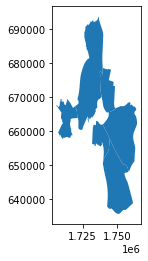

In [3]:
zone.plot();

Read in the pkl file

In [4]:
may = pd.read_pickle('../data/may.pkl')

In [5]:
may.head()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,companyname,year,month,day,hour,min
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,Bi,2019,5,1,0,1
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,Powered,35.0,scooter,Bi,2019,5,1,0,1
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,Powered,90.0,scooter,Bi,2019,5,1,0,1
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,Powered,88.0,scooter,Bi,2019,5,1,0,1
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,Powered,98.0,scooter,Bi,2019,5,1,0,1


Create geometry column for may.

In [ ]:
may['geometry'] = may.apply(lambda x: Point((x.longitude, 
                                            x.latitude)), 
                                        axis=1);
pd.set_option('display.max_columns', 15)##sets dataframe to view 15 columns

Match the crs

In [ ]:
zone.crs

In [ ]:
may_geo = gpd.GeoDataFrame(may, 
                           crs = zone.crs, 
                           geometry = may['geometry'])
type(may_geo)
may_geo.head()

In [ ]:
may_geo.crs

Join the geodataframes with a spatial join. Only keep the zone_id and geometry from promise_zone.

In [ ]:
zone = promise_zone[['ZONE_ID', 'geometry']]
zone.head()

In [ ]:
may_zone = gpd.sjoin(may_geo, zone, op = 'within')

In [ ]:
may_zone.head()

Inspect the zones

In [ ]:
may_zone['ZONE_ID'].value_counts()

Let's focus on zone 6 for now

In [ ]:
may_zone6 = may_zone.loc[may_by_zone['ZONE_ID'] == 6]
may_zone6.shape

In [ ]:
polygon_zone6 = zone.loc[zone['ZONE_ID'] == 6]
polygon_zone6.shape

In [ ]:
ax = polygon_zone6.plot(figsize = (8, 10), color = 'lightgreen')
may_zone6.plot( ax = ax, column = 'sumdid');
plt.show();

Put it on a map

In [ ]:
polygon6.geometry.centroid

In [ ]:
center = polygon6.geometry.centroid[5]
print(center)

In [ ]:
area_center = [center.y, center.x]
print(area_center)

In [ ]:
map_zone6 = folium.Map(location =  area_center, zoom_start = 12)
map_zone6

In [ ]:
i = 0
for row_index, row_values in may_in_6.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [ ]:
map_zone6 = folium.Map(location =  area_center, zoom_start = 13)

marker_cluster = MarkerCluster().add_to(map_zone6)

folium.GeoJson(polygon6).add_to(map_zone6)

for row_index, row_values in may_in_6.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    tool = [str(row_values['sumdid']), str(row_values['pubdatetime'])]
    icon=folium.Icon(color="blue",icon="map-pin", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        tooltip = tool, icon = icon) 

    marker.add_to(marker_cluster)
map_zone6.save('../data/map_zone6.html')

#display our map
map_zone6